In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_classification

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


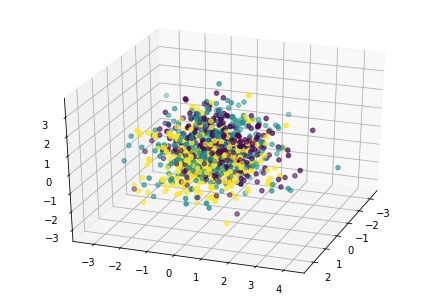

In [10]:
X, y = make_classification(n_samples=1000, n_features=4, n_redundant=0, n_classes=3, n_informative=2,
                           n_clusters_per_class=1,class_sep =0.5, random_state =10)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o',c=y)

[0.31967033 0.27611676]
[1.22314527 1.05649751]


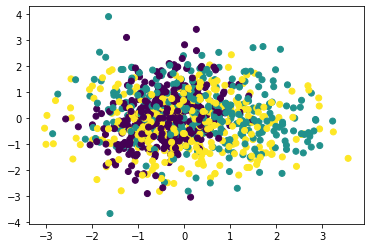

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=y)
plt.show()

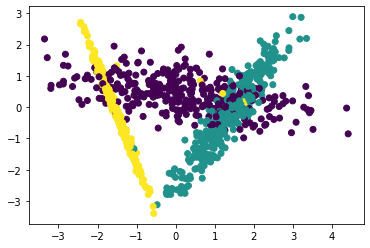

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_new = lda.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=y)
plt.show()

如果我们的数据是有类别标签的，那么优先选择LDA去尝试降维；

当然也可以使用PCA做很小幅度的降维去消去噪声，然后再使用LDA降维。

如果没有类别标签，那么肯定PCA是最先考虑的一个选择了

首先我们看看相同点：

1）两者均可以对数据进行降维。

2）两者在降维时均使用了矩阵特征分解的思想。

3）两者都假设数据符合高斯分布。

我们接着看看不同点：

1）LDA是有监督的降维方法，而PCA是无监督的降维方法

2）LDA降维最多降到类别数k-1的维数，而PCA没有这个限制。

3）LDA除了可以用于降维，还可以用于分类。

4）LDA选择分类性能最好的投影方向，而PCA选择样本点投影具有最大方差的方向。